# Data PreProcessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
##Loading csv files
path = r'/content/drive/MyDrive/Data Base/Velocity parameter/S7_V.csv'

df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])
print (df.info)
print(df.shape)

#Standarizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler( feature_range = (0, 1) )
x = scaler.fit_transform(df)
x = pd.DataFrame(data = x, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])

scaler = MinMaxScaler( feature_range = (0, 1) )
df = scaler.fit_transform(df)
df = pd.DataFrame(data = df, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])

y = df['Step_length']
y = pd.DataFrame(y)
print("y = \n",y)
print(y.shape)

print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape



-1 in df['Step_length']

<bound method DataFrame.info of        Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  \
0            2.36       -9.07        3.08        -0.31        -1.00   
1            2.33       -9.09        2.99        -0.13        -1.94   
2            2.57       -8.98        2.89         1.06        -4.12   
3            2.70       -8.88        2.93         0.37        -3.81   
4            2.69       -8.93        3.03        -0.44        -3.37   
...           ...         ...         ...          ...          ...   
58172        3.47       -9.23        0.74        13.88        35.69   
58173        3.65       -9.46        0.56        15.44        39.00   
58174        3.98       -9.46        0.31        18.00        41.63   
58175        4.39       -9.37        0.19        19.94        43.88   
58176        5.19       -8.96       -0.04        22.31        50.75   

       Gyro_z_knee  Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  \
0            -3.69        -21.56     

False

## Create train and test subdatasets

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(46541, 25) (11636, 25)
(46541, 1) (11636, 1)


## Graphics

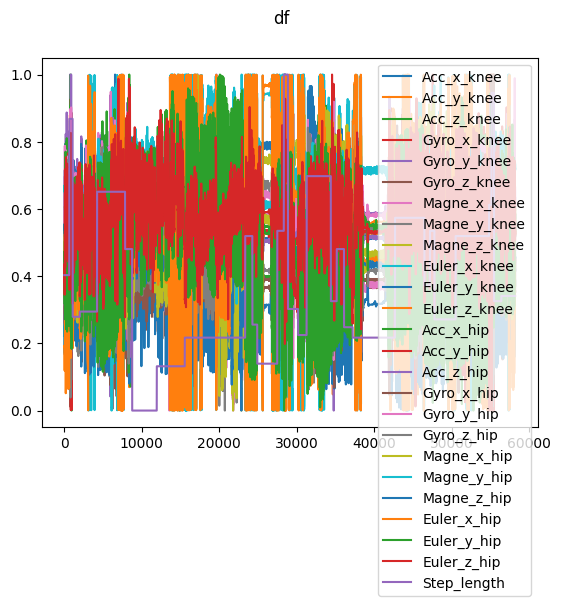

Loaded 58177 subjects


In [5]:
name = 'df'
columns_names = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


#Sliding Window Proccessing

In [6]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

   Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  Gyro_z_knee  \
0    0.515794    0.536572    0.421685     0.529121     0.585638     0.362399   
1    0.515404    0.536216    0.420243     0.529395     0.584790     0.362759   
2    0.518523    0.538174    0.418642     0.531207     0.582824     0.362680   
3    0.520213    0.539954    0.419283     0.530156     0.583103     0.362263   
4    0.520083    0.539064    0.420884     0.528923     0.583500     0.361982   

   Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  ...  Gyro_x_hip  \
0      0.375661      0.490132      0.611822      0.222787  ...    0.385616   
1      0.375661      0.490132      0.611822      0.222954  ...    0.388336   
2      0.369261      0.490132      0.606424      0.222954  ...    0.387977   
3      0.369261      0.490132      0.606424      0.222954  ...    0.388109   
4      0.369261      0.490132      0.606424      0.222954  ...    0.388581   

   Gyro_y_hip  Gyro_z_hip  Magne_x_hip  Magne_y_hi

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(46461, 100, 25) (11616, 100, 25)
(46461, 1) (11616, 1)


In [8]:
print(X_train.shape[1])
print(X_train.shape[2])
print(y_train.shape[1])
print(np.unique(y_train).shape[0])
print(X_train.shape[0])


100
25
1
25
46461


# **LSTM + 3 DL Archicture**

#### Load Tensorflow libraries

In [9]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import numpy as np
#print(tf.version.VERSION)
#print(tf.keras.__version__)

In [10]:
num_features = 25
hidden_unit = 64
Batch_Size = 128
window_size = 100
epochs = 25

In [11]:
def create_lstm_model(X_train, y_train, window_size, num_features, hidden_unit):
    inp1 = tf.keras.Input(shape=(window_size, num_features))


    first_LSTM_layer = tf.keras.layers.LSTM(hidden_unit, name='lstm_1', return_sequences= False, return_state=True)
    first_layer, _, _ = first_LSTM_layer(inp1)

    Dense_layer_1 = tf.keras.layers.Dense(32, activation='relu')
    Dense_layer_2 = tf.keras.layers.Dense(16, activation='relu')
    Dense_layer_3 = tf.keras.layers.Dense(8, activation='relu')
    regressor_layer = tf.keras.layers.Dense(1, activation='relu')

    Dense_1_output =  Dense_layer_1(first_layer)
    Dense_2_output =  Dense_layer_2(Dense_1_output)
    Dense_3_output =  Dense_layer_3(Dense_2_output)
    Regressor =  regressor_layer(Dense_3_output)

    model = tf.keras.Model(inputs=inp1, outputs= Regressor)


    model.compile(optimizer='RMSprop', loss='mse', metrics=['mean_squared_error', 'accuracy',])


    model.summary()

    ########Rebuilt Model########
    rebuilt_input = tf.keras.Input(shape=(1, num_features))
    ####'Build states input'######
    state_h_1_input = tf.keras.Input(shape=(hidden_unit,))
    state_c_1_input = tf.keras.Input(shape=(hidden_unit,))
    states_inputs_combination = [state_h_1_input, state_c_1_input]

    ###'first layer'
    rebuilt_first_layer, state_h_1, state_c_1 = first_LSTM_layer(rebuilt_input,
                                                                 initial_state=states_inputs_combination[:2])

    decoder_states = [state_h_1, state_c_1]

    D_1 = Dense_layer_1(rebuilt_first_layer)
    D_2 = Dense_layer_2(D_1)
    D_3 = Dense_layer_3(D_2)
    rebuilt_output = regressor_layer(D_3)

    rebuilt_model = tf.keras.Model([rebuilt_input] + states_inputs_combination, [rebuilt_output] + decoder_states)
    rebuilt_model.summary()

    # Plotting model
    plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')

    return model, rebuilt_model, plot

# fit network
model, _, plot = create_lstm_model(X_train, y_train, window_size, num_features, hidden_unit)
start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, batch_size=Batch_Size, verbose=1, shuffle=False, validation_data=(X_test, y_test))

# evaluate model
end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

plot


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 25)]         0         
                                                                 
 lstm_1 (LSTM)               [(None, 64),              23040     
                              (None, 64),                        
                              (None, 64)]                        
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9     

In [12]:
datafolder = '/content/drive/MyDrive/IntentoCodigo/V'
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])no h
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_LSTM_DL.png")

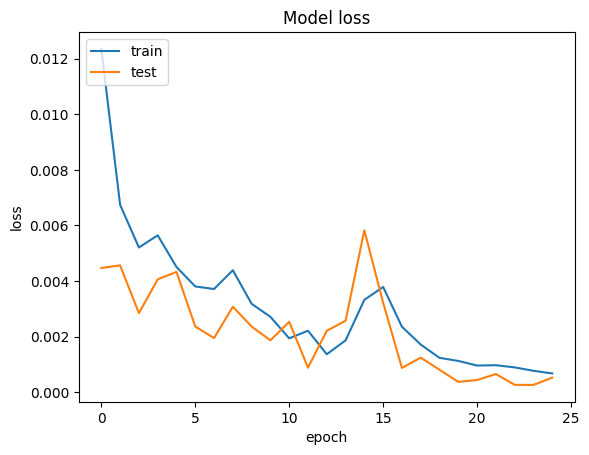

In [13]:
# summarize history for accuracy
plt.plot(result.history['mean_squared_error'])
plt.plot(result.history['val_mean_squared_error'])
plt.title('Model Error')
plt.ylabel('Mean Squared error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and load network

In [14]:
### Save
dnn_filename = datafolder + "trained_network_LSTM_DLS6.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_network_LSTM_DLS6.h5")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: /content/drive/MyDrive/IntentoCodigo/Vtrained_network_LSTM_DLS6.h5
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 25)]         0         
                                                                 
 lstm_1 (LSTM)               [(None, 64),              23040     
                              (None, 64),                        
                              (None, 64)]                        
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                            

### Evaluate Model with new data (1 Subject)

In [15]:
##Loading csv files

path = r'/content/drive/MyDrive/Data Base/Subjects/S7/ S7_106m_outdoor_velocity.CSV'

df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])
print (df.info)
print(df.shape)

#Standarizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler( feature_range = (0, 1) )
xtest = scaler.fit_transform(df)
xtest = pd.DataFrame(data = x, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])

scaler = MinMaxScaler( feature_range = (0, 1) )
dftest = scaler.fit_transform(df)
dftest = pd.DataFrame(data = df, columns = ['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])

ytest = df['Step_length']
ytest = pd.DataFrame(y)
print("y = \n",y)
print(ytest.shape)

print("x = \n",x)
print(xtest.shape)

#Verifying data shape
xtest.shape, ytest.shape

<bound method DataFrame.info of       Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  \
0           2.27       -9.23        2.78        -2.87         2.00   
1           2.57       -9.05        2.70        -1.56         1.50   
2           2.51       -9.24        2.67         0.31        -2.81   
3           2.82       -9.09        2.66         0.75        -4.56   
4           2.98       -9.11        2.70         0.69        -5.31   
...          ...         ...         ...          ...          ...   
8626        3.77       -8.69        2.17         1.56        -5.75   
8627        3.58       -8.79        2.34         0.88        -3.87   
8628        3.54       -8.85        2.38         0.56        -3.12   
8629        3.49       -8.77        2.29         1.31        -4.00   
8630        3.64       -8.81        2.22         1.56        -5.12   

      Gyro_z_knee  Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  \
0          -13.13        -43.19         31.00     

<ipython-input-15-de250395b60b>:5: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df= pd.read_csv(path, skiprows=1, usecols=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], names=['Acc_x_knee','Acc_y_knee','Acc_z_knee','Gyro_x_knee','Gyro_y_knee','Gyro_z_knee','Magne_x_knee','Magne_y_knee','Magne_z_knee','Euler_x_knee','Euler_y_knee','Euler_z_knee','Acc_x_hip','Acc_y_hip','Acc_z_hip','Gyro_x_hip','Gyro_y_hip','Gyro_z_hip','Magne_x_hip','Magne_y_hip','Magne_z_hip','Euler_x_hip','Euler_y_hip','Euler_z_hip','Step_length'])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.p

((58177, 25), (58177, 1))

In [16]:
print(dftest.head())
print(dftest.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = dftest.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xxtest = np.array([ xtest.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xxtest.shape)

yytest = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yytest.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)
# Preprocess the new dataset

print(xxtest.shape)
print(yytest.shape)


# Evaluate the model on the new dataset
mse  = model.evaluate(xxtest, yytest, verbose=0)
print("Mean squared error on new dataset:", mse)

   Acc_x_knee  Acc_y_knee  Acc_z_knee  Gyro_x_knee  Gyro_y_knee  Gyro_z_knee  \
0        2.27       -9.23        2.78        -2.87         2.00       -13.13   
1        2.57       -9.05        2.70        -1.56         1.50       -13.75   
2        2.51       -9.24        2.67         0.31        -2.81       -14.06   
3        2.82       -9.09        2.66         0.75        -4.56       -13.69   
4        2.98       -9.11        2.70         0.69        -5.31       -12.88   

   Magne_x_knee  Magne_y_knee  Magne_z_knee  Euler_x_knee  ...  Gyro_x_hip  \
0        -43.19         31.00        -14.38        112.00  ...       40.19   
1        -43.19         31.00        -14.38        112.31  ...        4.00   
2        -43.19         31.00        -14.38        112.56  ...        1.19   
3        -42.75         31.37        -14.75        112.62  ...        2.44   
4        -42.75         31.37        -14.75        112.81  ...        3.50   

   Gyro_y_hip  Gyro_z_hip  Magne_x_hip  Magne_y_hi

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

model = tf.keras.models.load_model("/content/drive/MyDrive/IntentoCodigo/Vtrained_network_LSTM_DLS6.h5")

# Supongamos que X_test es la lista de etiquetas reales y y_pred es la lista de predicciones del modelo.
y_pred = model.predict(xxtest)

print(y_pred.shape)
print("Med Step Length Prediction", y_pred[0:1])
#filtered_data = np.where(y_pred < 0.2, 0, y_pred)
mask = y_pred != 0
mediciones_filtradas = y_pred[mask]

mean_prediction = np.mean(mediciones_filtradas)
max = np.max(mediciones_filtradas)
min = np.min(mediciones_filtradas)
print("Max", max)
print("Min", min)

print("Mean of Predictions:", mean_prediction)

# Cálculo de métricas de regresión
mse = metrics.mean_squared_error(yytest, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(yytest, y_pred)
r2 = metrics.r2_score(yytest, y_pred)


print("Mean Squared Error: {}".format(mse))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mae))
print("R-squared: {}".format(r2))



267/267 [==============================] - 1s 3ms/step
(8531, 1)
Med Step Length Prediction [[0.43201968]]
Max 0.8769795
Min 0.29215977
Mean of Predictions: 0.5109826
Mean Squared Error: 0.0006932875292139143
Root Mean Squared Error: 0.02633035376165528
Mean Absolute Error: 0.020417345867337993
R-squared: 0.9793221782613579


In [18]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Lista de nombres de archivos .csv
# archivos_csv = ['/content/drive/MyDrive/IntentoCodigo/Copia de S9_20m_return_regular velocity.CSV', '/content/drive/MyDrive/IntentoCodigo/Copia de S9_10m_regular_velocity.CSV', '/content/drive/MyDrive/IntentoCodigo/Copia de S9_10m_fast_velocity.CSV', '/content/drive/MyDrive/IntentoCodigo/Copia de Copia de S9_10m_slow_velocity.CSV']

# # Crear subplots en una figura
# num_subplots = len(archivos_csv)
# fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 6*num_subplots))

# Crear un DataFrame consolidado
#datos_consolidados = pd.concat([pd.read_csv(archivo) for archivo in archivos_csv])

# Recorrer los archivos y crear las gráficas en los subplots
# for i, archivo in enumerate(archivos_csv):
#     datos = pd.read_csv(archivo)
#     axs[i].plot(datos[' Euler_y_hip'], label='Euler_y_hip')
#     axs[i].set_xlabel('Muestras')
#     axs[i].set_ylabel('Valores')
#     axs[i].set_title(f'Gráficas para {archivo}')
#     axs[i].legend()

# Ajustar los subplots para evitar superposiciones
#plt.tight_layout()

# Mostrar la figura con las gráficas
#plt.show()


# Visualizar los datos en una gráfica
#plt.figure(figsize=(10, 6))
#for columna in datos_consolidados.columns:
    #plt.plot(datos_consolidados[" Euler_y_hip"], label='Euler_y_hip')
#plt.legend()
#plt.xlabel('Muestras')
#plt.ylabel('Valores')
#plt.title('Gráfica Consolidada de Sensores Inerciales')
#plt.show()